In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the File

In [2]:
path = r"C:\Users\parik\Documents\Data sets\Income Pyramids-20211206T143645Z-001\Income Pyramids\Household Incomes\household_income_20140131_MS_rev_csv\household_income_20140131_MS_rev.csv"
df = pd.read_csv(path)
df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,GENDER_GROUP,SIZE_GROUP,TOTAL_INCOME,INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES,INCOME_OF_ALL_MEMBERS_FROM_WAGES,INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES,INCOME_OF_HOUSEHOLD_FROM_RENT,INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION,INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Female Majority,8-10 Members,19000,19000,19000,0,0,0,0,0
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Dominated,4 Members,22000,22000,22000,0,0,0,0,0
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Majority,3 Members,5600,5600,5600,0,0,0,0,0
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Majority,8-10 Members,25100,25100,25100,0,0,0,0,0
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Balanced,4 Members,7700,3500,3500,4200,0,0,0,4200


# Cross Section EDA

In [3]:
print(df.columns)
print(df.STATE.unique())
print(df.AGE_GROUP.unique())

Index(['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID',
       'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE',
       'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS',
       'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS',
       'HH_NON_RESPONSE_FOR_STATE_MS', 'AGE_GROUP', 'OCCUPATION_GROUP',
       'EDUCATION_GROUP', 'GENDER_GROUP', 'SIZE_GROUP', 'TOTAL_INCOME',
       'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
       'INCOME_OF_ALL_MEMBERS_FROM_WAGES',
       'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT',
       'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
       'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
       'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT'],
      dtype='object')
['Jammu & Kashmir' 'Himachal Pradesh' 'Chandigarh' 'Punjab' 'Haryana'
 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Uttarakhand' 'Gujarat' 'Maharashtra'
 'Goa' 'Madhya Pradesh' 'Karnataka' 'Andhra Pradesh' 'Telangana'
 

<AxesSubplot:>

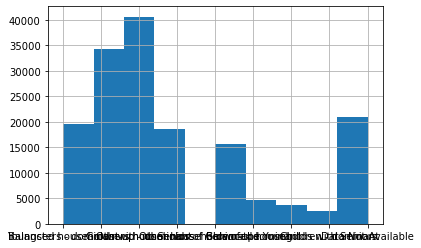

In [4]:
df["AGE_GROUP"].hist()

In [5]:
age_dist = df.groupby("AGE_GROUP").count()["HH_ID"]


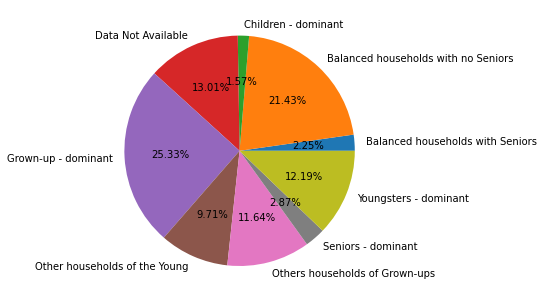

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(age_dist, labels = age_dist.index,autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

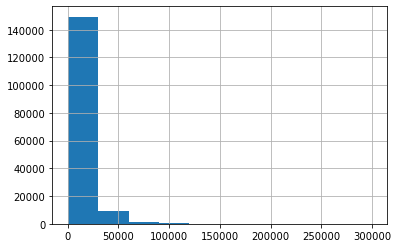

In [7]:
df['INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES'].hist()

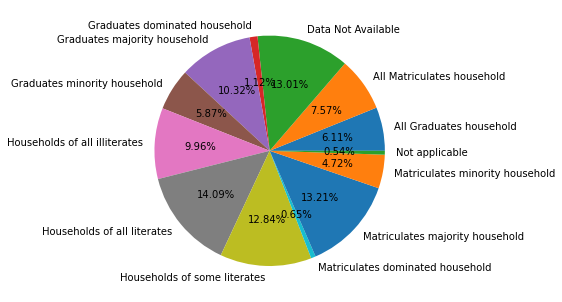

In [8]:
edugroup_dist = df.groupby("EDUCATION_GROUP").count()["HH_ID"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(edugroup_dist, labels = edugroup_dist.index,autopct='%1.2f%%')
plt.show()

In [9]:
df.columns

Index(['HH_ID', 'STATE', 'HR', 'DISTRICT', 'REGION_TYPE', 'STRATUM', 'PSU_ID',
       'MONTH_SLOT', 'MONTH', 'RESPONSE_STATUS', 'REASON_FOR_NON_RESPONSE',
       'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS',
       'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS',
       'HH_NON_RESPONSE_FOR_STATE_MS', 'AGE_GROUP', 'OCCUPATION_GROUP',
       'EDUCATION_GROUP', 'GENDER_GROUP', 'SIZE_GROUP', 'TOTAL_INCOME',
       'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
       'INCOME_OF_ALL_MEMBERS_FROM_WAGES',
       'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT',
       'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
       'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
       'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT'],
      dtype='object')

In [10]:
df['SIZE_GROUP'].unique()

array(['8-10 Members', '4 Members', '3 Members', '6 Members', '7 Members',
       '2 Members', '5 Members', '1 Member', 'Data Not Available',
       '11-15 Members', '> 15 Members'], dtype=object)

In [11]:
# cols = ['TOTAL_INCOME','INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES','INCOME_OF_ALL_MEMBERS_FROM_WAGES',
#        'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES', 'INCOME_OF_HOUSEHOLD_FROM_RENT',
#        'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
#        'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
#        'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT']
# for col in cols:
#     edu_income_dist = df.groupby('EDUCATION_GROUP').agg({col:np.mean}).drop('Data Not Available',axis=0)    
#     edu_income_dist.plot.barh()    

In [12]:
edu_income_dist = df.groupby('EDUCATION_GROUP').agg(np.mean).drop('Data Not Available',axis=0)
cols_to_drop = ['HH_ID', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS',
       'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS',
       'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS',
       'TOTAL_INCOME', 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES','INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES']
for col in cols_to_drop:
    edu_income_dist.drop(col,axis=1,inplace=True)
edu_income_dist.columns

Index(['INCOME_OF_ALL_MEMBERS_FROM_WAGES', 'INCOME_OF_HOUSEHOLD_FROM_RENT',
       'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
       'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
       'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT'],
      dtype='object')

In [13]:
edu_income_dist.index
cols_to_drop = ['All Graduates household','Graduates dominated household', 'Graduates majority household']
for col in cols_to_drop:
    edu_income_dist.drop(col,axis=0,inplace=True)

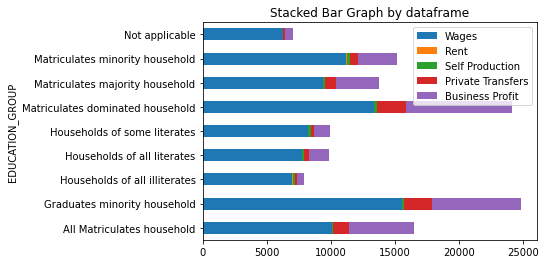

In [14]:
edu_income_dist.plot(kind='barh', stacked=True,title='Stacked Bar Graph by dataframe')
plt.legend(["Wages", "Rent", "Self Production", "Private Transfers","Business Profit"])

In [15]:
# col = "Graduates dominated household"
# edu_income_dist.drop(col,axis=0,inplace=True)
# edu_income_dist.drop("All Graduates household",axis=0,inplace=True)
# edu_income_dist.plot(kind='barh', stacked=True,title='Stacked Bar Graph by dataframe')
# plt.legend(["Wages", "Rent", "Self Production", "Private Transfers","Business Profit"])

# Marital Status

In [16]:
df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,RESPONSE_STATUS,...,GENDER_GROUP,SIZE_GROUP,TOTAL_INCOME,INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES,INCOME_OF_ALL_MEMBERS_FROM_WAGES,INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES,INCOME_OF_HOUSEHOLD_FROM_RENT,INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION,INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT
0,77051739,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Female Majority,8-10 Members,19000,19000,19000,0,0,0,0,0
1,61287374,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Dominated,4 Members,22000,22000,22000,0,0,0,0,0
2,34049553,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Majority,3 Members,5600,5600,5600,0,0,0,0,0
3,92526123,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Male Majority,8-10 Members,25100,25100,25100,0,0,0,0,0
4,61508707,Jammu & Kashmir,HR 1,Bandipore,RURAL,HR 1_RURAL_R,PSU_ID_7959,May 2014,Jan 2014,Accepted,...,Balanced,4 Members,7700,3500,3500,4200,0,0,0,4200
